In [1]:
import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\91998\Downloads\Multiple CSV\Multiple CSV\9.random.csv",header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


In [4]:
df.head()

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [5]:
df[2].unique()

array([0., 1.])

### Observation:  we can say that our task is binary classification task as our target variable have 2 classes.

In [6]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

In [7]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

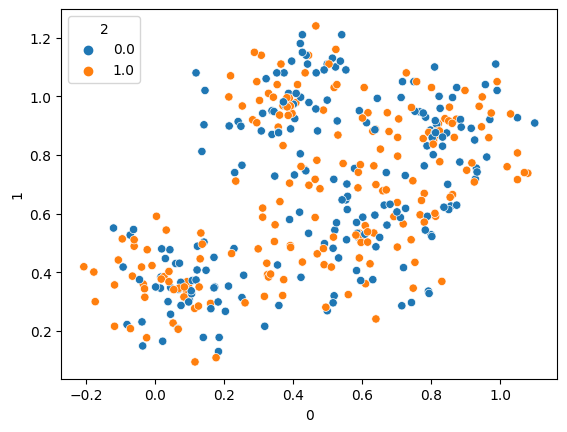

In [8]:
sns.scatterplot(data=df,x=0,y=1,hue=2)

### Observation: By viewing the above graph we can easily say that x and y s have non linear relationship. And the data points are overlapping.

In [9]:
## Splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [10]:
## Preprocessing train and test data
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

### Using Relu

In [30]:
model=Sequential()
model.add(Dense(30,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(34,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(28,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 30)                90        
                                                                 
 dense_17 (Dense)            (None, 34)                1054      
                                                                 
 dense_18 (Dense)            (None, 28)                980       
                                                                 
 dense_19 (Dense)            (None, 1)                 29        
                                                                 
Total params: 2153 (8.41 KB)
Trainable params: 2153 (8.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
## Training the model
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=25,validation_split=0.1)

Epoch 1/25
65/65 [==============================] - 1s 4ms/step - loss: 0.7657 - accuracy: 0.4691 - val_loss: 0.7625 - val_accuracy: 0.4167
Epoch 2/25
65/65 [==============================] - 0s 2ms/step - loss: 0.7607 - accuracy: 0.5278 - val_loss: 0.7615 - val_accuracy: 0.5000
Epoch 3/25
65/65 [==============================] - 0s 2ms/step - loss: 0.7554 - accuracy: 0.5432 - val_loss: 0.7669 - val_accuracy: 0.4167
Epoch 4/25
65/65 [==============================] - 0s 2ms/step - loss: 0.7556 - accuracy: 0.5216 - val_loss: 0.7642 - val_accuracy: 0.4167
Epoch 5/25
65/65 [==============================] - 0s 2ms/step - loss: 0.7527 - accuracy: 0.5093 - val_loss: 0.7575 - val_accuracy: 0.5000
Epoch 6/25
65/65 [==============================] - 0s 2ms/step - loss: 0.7526 - accuracy: 0.5401 - val_loss: 0.7623 - val_accuracy: 0.4167
Epoch 7/25
65/65 [==============================] - 0s 2ms/step - loss: 0.7502 - accuracy: 0.5309 - val_loss: 0.7559 - val_accuracy: 0.5278
Epoch 8/25
65/65 [==

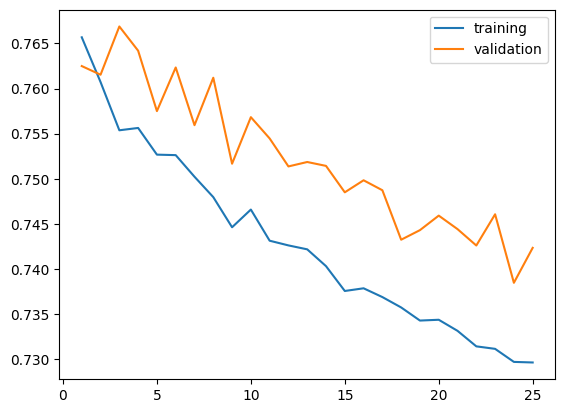

In [33]:
plt.plot(range(1,26),history.history["loss"],label="training")
plt.plot(range(1,26),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 7s 698us/step


<Axes: >

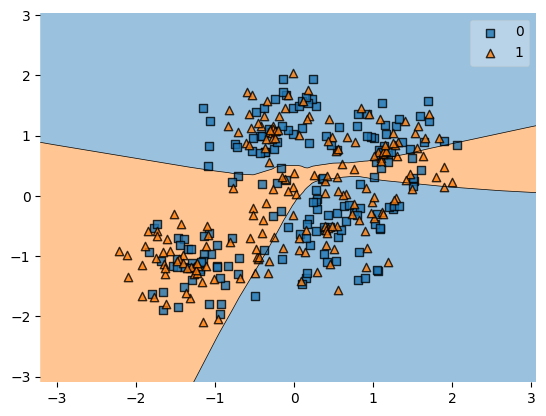

In [34]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_trainp,y_train.values,clf=model)

9600/9600 [==============================] - 7s 713us/step


<Axes: >

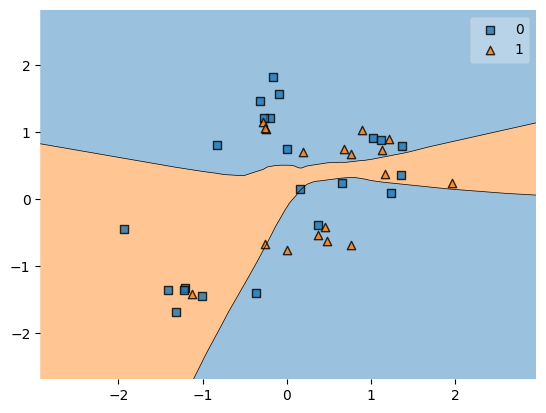

In [35]:
plot_decision_regions(x_testp,y_test.values,clf=model)